# 📝 Exercise M4.03

In all previous notebooks, we only used a single feature in `data`. But we
have already shown that we could add new features to make the model more
expressive by deriving new features, based on the original feature.

The aim of this notebook is to train a linear regression algorithm on a
dataset more than a single feature.

We will load a dataset about house prices in California.
The dataset consists of 8 features regarding the demography and geography of
districts in California and the aim is to predict the median house price of
each district. We will use all 8 features to predict the target, the median
house price.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [1]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(as_frame=True, return_X_y=True)
target *= 100  # rescale the target in k$
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Now this is your turn to train a linear regression model on this dataset.
You will need to:
* create a linear regression model;
* execute a cross-validation with 10 folds and use the mean absolute error
  (MAE) as metric. Ensure to return the fitted estimators;
* compute mean and std of the MAE in thousands of dollars (k$);
* show the values of the coefficients for each feature using a boxplot by
  inspecting the fitted model returned from the cross-validation. Hint: you
  use the function
  [`df.plot.box()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html)
  to plot a box plot.

In [2]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [4]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target,
                            scoring='neg_mean_absolute_error',
                            cv=10, return_estimator=True)
cv_results

{'fit_time': array([0.04100108, 0.01433301, 0.01400042, 0.01800084, 0.01800609,
        0.01300764, 0.01300406, 0.01200128, 0.01300025, 0.01099753]),
 'score_time': array([0.00700116, 0.00500011, 0.00500369, 0.00499988, 0.00699878,
        0.00499988, 0.00599933, 0.00500035, 0.00499964, 0.00600243]),
 'estimator': [LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()],
 'test_score': array([-53.51667968, -52.91050431, -67.85147748, -47.48574496,
        -65.19784225, -50.0921865 , -39.62986083, -64.00626799,
        -60.28617579, -43.54469953])}

In [9]:
print(f"The MAE is {-cv_results['test_score'].mean():.1f}k$ +/- {cv_results['test_score'].std():.1f}k$")

The MAE is 54.5k$ +/- 9.1k$


In [10]:
import pandas as pd

weights = pd.DataFrame(
    [est.coef_ for est in cv_results["estimator"]], columns=data.columns)

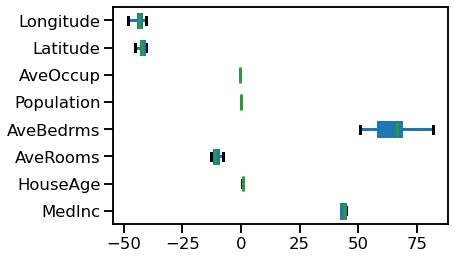

In [13]:
_ = weights.plot.box(vert=False)